<a href="https://colab.research.google.com/github/gomlfx/ApiaryFund/blob/master/autogluon_M1_next_day_graph_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install autogluon

In [2]:
#!pip install --upgrade mxnet

In [3]:
#designed for Jupyter/kaggle/colab
import pandas as pd
import numpy as np
#import matplotlib for plotting 
import matplotlib.pyplot as plt
%matplotlib inline
#import normalization
from sklearn import preprocessing

#autogluon
from autogluon.tabular import TabularDataset, TabularPredictor  

In [4]:
 #MT4 csv 
df=pd.read_csv('EURUSD1.csv', names=['d','t','eu_o','eu_h','eu_l','eu_c','eu_v']) 

In [5]:
df=pd.DataFrame(data=df.tail(50000))
df

,d,t,eu_o,eu_h,eu_l,eu_c,eu_v
15000,2021.11.03,19:46,1.15788,1.15792,1.15777,1.15781,42
15001,2021.11.03,19:47,1.15780,1.15787,1.15780,1.15787,67
15002,2021.11.03,19:48,1.15787,1.15793,1.15785,1.15792,51
15003,2021.11.03,19:49,1.15790,1.15807,1.15790,1.15801,92
15004,2021.11.03,19:50,1.15800,1.15817,1.15800,1.15807,82
...,...,...,...,...,...,...,...
64995,2021.12.24,23:50,1.13210,1.13210,1.13055,1.13182,17
64996,2021.12.24,23:51,1.13181,1.13200,1.13181,1.13181,13
64997,2021.12.24,23:52,1.13179,1.13198,1.13063,1.13068,14
64998,2021.12.24,23:53,1.13071,1.13125,1.13036,1.13105,19


In [6]:
df = df.drop(['eu_o','eu_h','eu_l','eu_v'], axis=1)

In [7]:
pd.set_option('display.max_columns', 100)
df 


,d,t,eu_c
15000,2021.11.03,19:46,1.15781
15001,2021.11.03,19:47,1.15787
15002,2021.11.03,19:48,1.15792
15003,2021.11.03,19:49,1.15801
15004,2021.11.03,19:50,1.15807
...,...,...,...
64995,2021.12.24,23:50,1.13182
64996,2021.12.24,23:51,1.13181
64997,2021.12.24,23:52,1.13068
64998,2021.12.24,23:53,1.13105


In [8]:
df = df.drop(['d','t'], axis=1)

In [9]:
df4 = pd.DataFrame(data=df.iloc[-5760:-4320])
df4['row_num']=np.arange(len(df4))
df4.set_index('row_num',inplace=True)
df4 = df4.rename(columns={'eu_c':'day_4'})

print(df4)

df3 = pd.DataFrame(data=df.iloc[-4320:-2880])
df3['row_num']=np.arange(len(df3))
df3.set_index('row_num',inplace=True)
df3 = df3.rename(columns={'eu_c':'day_3'})

print(df3)

df2 = pd.DataFrame(data=df.iloc[-2880:-1440])
df2['row_num']=np.arange(len(df2))
df2.set_index('row_num',inplace=True)
df2 = df2.rename(columns={'eu_c':'day_2'})

print(df2)

df1 = pd.DataFrame(data=df.iloc[-1440:])
df1['row_num']=np.arange(len(df1))
df1.set_index('row_num',inplace=True)
df1 = df1.rename(columns={'eu_c':'day_1'})
print(df1)


           day_4
row_num         
0        1.12763
1        1.12754
2        1.12764
3        1.12763
4        1.12756
...          ...
1435     1.12808
1436     1.12808
1437     1.12812
1438     1.12811
1439     1.12811

[1440 rows x 1 columns]
           day_3
row_num         
0        1.12795
1        1.12800
2        1.12800
3        1.12800
4        1.12806
...          ...
1435     1.13327
1436     1.13325
1437     1.13325
1438     1.13322
1439     1.13323

[1440 rows x 1 columns]
           day_2
row_num         
0        1.13332
1        1.13323
2        1.13317
3        1.13305
4        1.13308
...          ...
1435     1.13270
1436     1.13271
1437     1.13271
1438     1.13270
1439     1.13276

[1440 rows x 1 columns]
           day_1
row_num         
0        1.13274
1        1.13278
2        1.13270
3        1.13280
4        1.13281
...          ...
1435     1.13182
1436     1.13181
1437     1.13068
1438     1.13105
1439     1.13133

[1440 rows x 1 columns]


In [10]:
df_train = pd.concat([df4,df3,df2,df1], axis=1)
df_train = pd.DataFrame(data=df_train)
df_train


,day_4,day_3,day_2,day_1
row_num,,,,
0,1.12763,1.12795,1.13332,1.13274
1,1.12754,1.12800,1.13323,1.13278
2,1.12764,1.12800,1.13317,1.13270
3,1.12763,1.12800,1.13305,1.13280
4,1.12756,1.12806,1.13308,1.13281
...,...,...,...,...
1435,1.12808,1.13327,1.13270,1.13182
1436,1.12808,1.13325,1.13271,1.13181
1437,1.12812,1.13325,1.13271,1.13068


In [11]:
df_test = pd.concat([df3,df2,df1], axis=1)
df_test['pred_col'] =0
df_test.rename(columns={'day_3': 'day_4', 'day_2': 'day_3','day_1':'day_2','pred_col':'day_1'}, inplace=True)
df_test = pd.DataFrame(data=df_test)
df_test

,day_4,day_3,day_2,day_1
row_num,,,,
0,1.12795,1.13332,1.13274,0
1,1.12800,1.13323,1.13278,0
2,1.12800,1.13317,1.13270,0
3,1.12800,1.13305,1.13280,0
4,1.12806,1.13308,1.13281,0
...,...,...,...,...
1435,1.13327,1.13270,1.13182,0
1436,1.13325,1.13271,1.13181,0
1437,1.13325,1.13271,1.13068,0


In [21]:
#predict new interval
label_new_interval = 'day_1' 
print("Summary of class variable: \n", df_train[label_new_interval].describe())

Summary of class variable: 
 count    1440.000000
mean        1.132451
std         0.000907
min         1.130300
25%         1.131810
50%         1.132520
75%         1.133023
max         1.134290
Name: day_1, dtype: float64


In [22]:
#predict new interval
save_path='agModels-predict_day1'
predictor = TabularPredictor(label=label_new_interval, path=save_path)
predictor.fit(df_train)#, presets='best_quality')
#.fit(presets='best_quality) is slower

Beginning AutoGluon training ...
AutoGluon will save models to "agModels-predict_day1/"
AutoGluon Version:  0.3.1
Train Data Rows:    1440
Train Data Columns: 3
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (1.13429, 1.1303, 1.13245, 0.00091)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12644.1 MB
	Train Data (Original)  Memory Usage: 0.03 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
	Sta

[1000]	train_set's rmse: 0.000191476	valid_set's rmse: 0.000231218
[2000]	train_set's rmse: 0.000170763	valid_set's rmse: 0.000220942
[3000]	train_set's rmse: 0.000159103	valid_set's rmse: 0.000217737
[4000]	train_set's rmse: 0.000150292	valid_set's rmse: 0.000215817
[5000]	train_set's rmse: 0.000143562	valid_set's rmse: 0.000215124


	-0.0002	 = Validation score   (root_mean_squared_error)
	16.92s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: LightGBM ...
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	-0.0002	 = Validation score   (root_mean_squared_error)
	2.21s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-0.0002	 = Validation score   (root_mean_squared_error)
	2.33s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: CatBoost ...
	-0.0002	 = Validation score   (root_mean_squared_error)
	2.06s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-0.0002	 = Validation score   (root_mean_squared_error)
	0.84s	 = Trainin

In [23]:
#contrast leaderboard result of train and test data
predictor.leaderboard(df_train, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist,-0.000086,-0.000191,0.108258,0.103894,0.014616,0.108258,0.103894,0.014616,1,True,2
1,WeightedEnsemble_L2,-0.000089,-0.000188,0.318623,0.226684,6.576458,0.008544,0.000689,0.378813,2,True,12
2,ExtraTreesMSE,-0.000105,-0.000193,0.140402,0.103230,0.838532,0.140402,0.103230,0.838532,1,True,7
3,RandomForestMSE,-0.000116,-0.000213,0.147563,0.103662,2.332784,0.147563,0.103662,2.332784,1,True,5
4,LightGBMLarge,-0.000130,-0.000239,0.021957,0.006614,0.871754,0.021957,0.006614,0.871754,1,True,11
5,CatBoost,-0.000143,-0.000212,0.003924,0.001897,2.056340,0.003924,0.001897,2.056340,1,True,6
6,LightGBM,-0.000150,-0.000227,0.022605,0.016120,2.206805,0.022605,0.016120,2.206805,1,True,4
7,KNeighborsUnif,-0.000158,-0.000197,0.103980,0.120580,0.050836,0.103980,0.120580,0.050836,1,True,1
8,LightGBMXT,-0.000161,-0.000215,0.490014,0.210128,16.923297,0.490014,0.210128,16.923297,1,True,3
9,NeuralNetMXNet,-0.000216,-0.000225,0.216007,0.153217,16.093292,0.216007,0.153217,16.093292,1,True,10


In [24]:
predictor.feature_importance(data=df_train)

Computing feature importance via permutation shuffling for 3 features using 1000 rows with 3 shuffle sets...
	3.75s	= Expected runtime (1.25s per shuffle set)
	2.39s	= Actual runtime (Completed 3 of 3 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
day_3,0.000985,0.000043,0.000318,3,0.001231,0.000738
day_4,0.000425,0.000021,0.000394,3,0.000544,0.000307
day_2,0.000414,0.000009,0.000076,3,0.000465,0.000364


In [25]:
#predict close
test_data = TabularDataset(df_test)
y_test = df_test[label_new_interval]
test_data_nolab = df_test.drop(columns=[label_new_interval])
test_data_nolab 

,day_4,day_3,day_2
row_num,,,
0,1.12795,1.13332,1.13274
1,1.12800,1.13323,1.13278
2,1.12800,1.13317,1.13270
3,1.12800,1.13305,1.13280
4,1.12806,1.13308,1.13281
...,...,...,...
1435,1.13327,1.13270,1.13182
1436,1.13325,1.13271,1.13181
1437,1.13325,1.13271,1.13068


In [26]:
#predict new interval
predictor = TabularPredictor.load(save_path)
y_pred = predictor.predict(test_data_nolab)
print("Predictions: \n", y_pred)
perf = predictor.evaluate_predictions(y_true = y_test, y_pred = y_pred, auxiliary_metrics=True)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
Evaluation: root_mean_squared_error on test data: -1.1318419286455679
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -1.1318419286455679,
    "mean_squared_error": -1.281066151440121,
    "mean_absolute_error": -1.1318417571485042,
    "r2": 0.0,
    "pearsonr": NaN,
    "median_absolute_error": -1.1317967176437378
}


Predictions: 
 row_num
0       1.131785
1       1.131424
2       1.131384
3       1.131338
4       1.131354
          ...   
1435    1.132037
1436    1.132036
1437    1.131928
1438    1.131912
1439    1.131993
Name: day_1, Length: 1440, dtype: float32


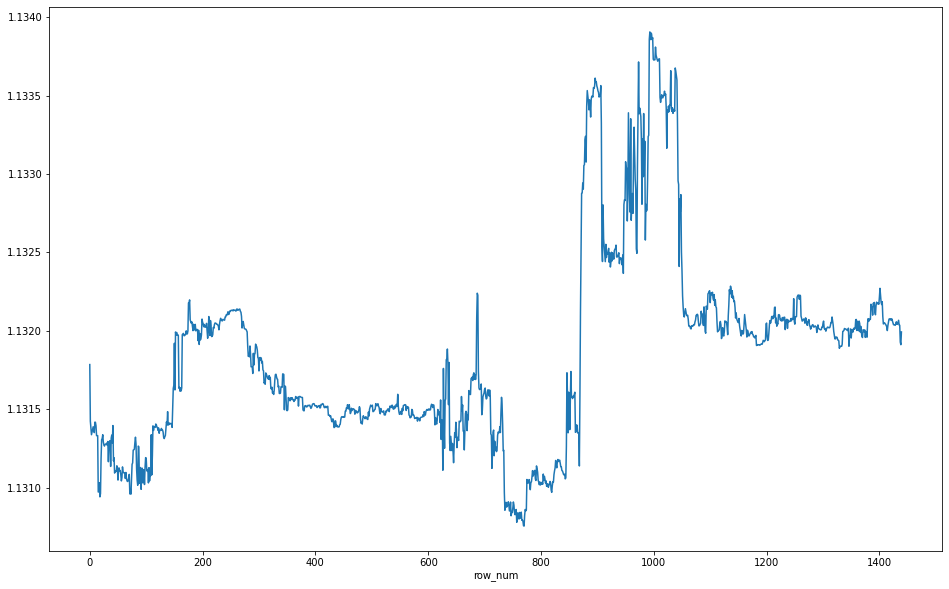

In [27]:
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120

ax = y_pred.plot(figsize = (16, 10)) 